In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Read this First

#### Remember that `tab` is is useful for autocompletion.

#### Remember that `shift + tab` is useful for rapidly obtaining usage + documentation.

### **Binary Images**

**For these exercises, please download the 'binary_objects.png' image and the 'binary_operations.png' image from the same GitHub folder. We will be doing some operations on them.**

**First, we'll see how we can change an image into a binary image.**

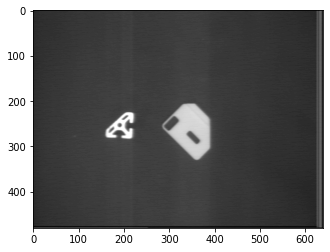

In [ ]:
import cv2
original_image = cv2.imread('binary_objects.png')
grayscale = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap='gray')

**Binary images by definition only have two pixel values, 255 or 0. Convert the grayscaled image into a binary image by setting all pixels greater than 125 in value to 255. Feel free to do it both using masking, or using cv2's threshold operation.**

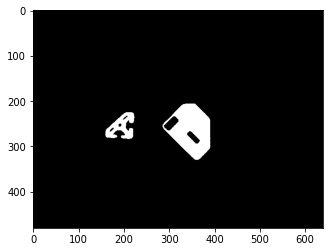

In [ ]:
ret,thresh = cv2.threshold(grayscale,125,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

**We now have some binary images, with pixels where the object is set to 255, and non-object pixels set to 0. Before we can do processing on each object individually, we have to separate them.**

**Use OpenCV's connectedComponents to separate out the different objects. Plot the image with a different pixel value for each object.**

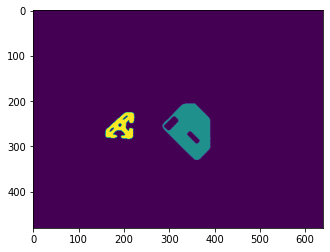

In [ ]:
n, objs = cv2.connectedComponents(thresh)
plt.imshow(objs)

**Now that each object detected has a unique pixel value, separate the objects from each other in the image. That is, create an image where we only have the first object present, and create a second image where we only have the second object present. Plot them side by side.**

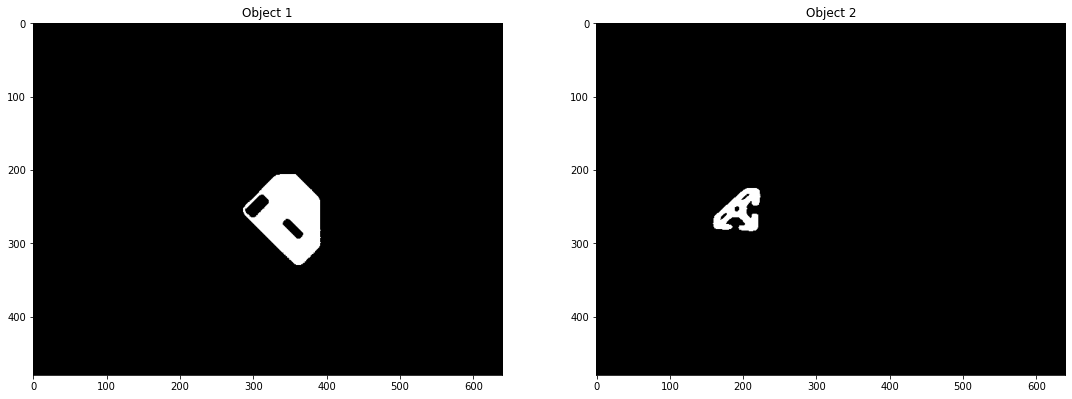

In [ ]:
obj_1 = ((objs == 1) * 255).astype(np.uint8)
obj_2 = ((objs == 2) * 255).astype(np.uint8)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18.5, 10.5)

ax1.imshow(obj_1, cmap='gray')
ax1.set_title('Object 1')

ax2.imshow(obj_2, cmap='gray')
ax2.set_title('Object 2')

plt.show()

**Now, find the area of each of the objects in the image. You should be getting around 7691 for one object and 2064 for the other. Print out the results.**

In [ ]:
print(obj_1[obj_1 > 0].size)
print(obj_2[obj_2 > 0].size)

7691
2064


**Another interesting we can do is to find the center of mass of the object itself. This is simply done by averaging the x and y coordinates of all of the pixels of that object. Compute the center of mass for the objects and print them.**

In [ ]:
y_1, x_1 = np.where(obj_1 > 0)
cx_1 = int(x_1.mean())
cy_1 = int(y_1.mean())
print(cx_1, cy_1)

y_2, x_2 = np.where(obj_2 > 0)
cx_2 = int(x_2.mean())
cy_2 = int(y_2.mean())
print(cx_2, cy_1)

349 263
195 263


**Now, using cv2.circle(), plot the centers of the objects as a red circle (of a reasonable radius) onto the original coloured images, and verify that this visually makes sense.**

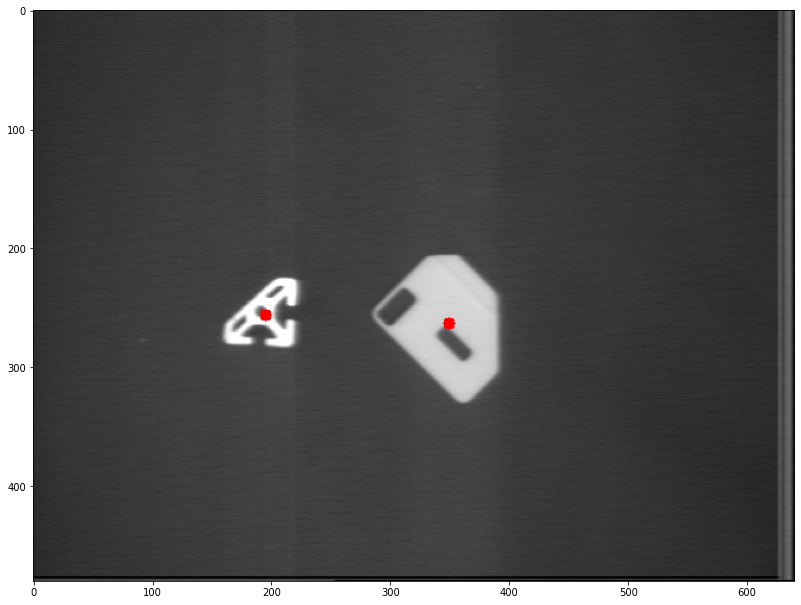

In [ ]:
copy_image = original_image.copy()

cv2.circle(copy_image, (cx_1, cy_1), 5, (255, 0, 0), -1)
cv2.circle(copy_image, (cx_2, cy_2), 5, (255, 0, 0), -1)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(copy_image)


### **Binary Morphology**

**Now we'll do some simple exploration with binary morphological operations. First load the 'binary_operations.png' image.**

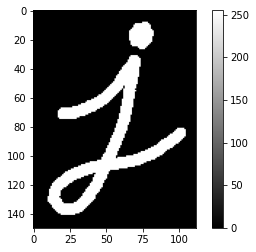

In [ ]:
binary_image = cv2.imread('binary_operations.png', 0)
plt.imshow(binary_image, cmap='gray')
plt.colorbar()

**We'll first do some simple binary erosion. Create a 5x5 kernel of ones, with dtype=uint8. Then, using OpenCV's cv2.erode(), perform binary erosion with the binary image. Plot the results.**

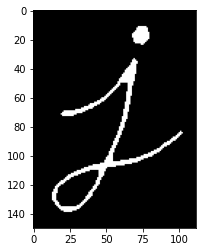

In [ ]:
kernel = np.ones((5,5), dtype=np.uint8)
er = cv2.erode(binary_image, kernel)
plt.imshow(er, cmap='gray')

**Now, using the same kernel, perform binary dilation on the original image, using cv2.dilate. Plot the results.**

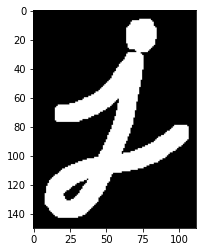

In [ ]:
di = cv2.dilate(binary_image, kernel)
plt.imshow(di, cmap='gray')

**Subtract the eroded image from the dilated image, and then plot it.**

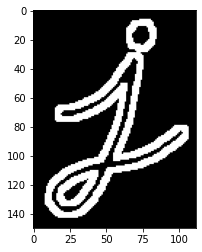

In [ ]:
plt.imshow(di - er, cmap='gray')

**Is this what you expected?**

Yes, The eroded image was thin while the dilated image was thick, so the dilated minus the eroded should be a thick exterior minus a thin middle strip.

**Now we want to see what happens when we do binary erosion and dilation in succession. Create a new image that is a copy of the original binary image, but with around 1% of the pixels randomly flipped.**

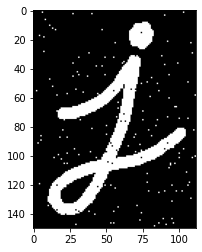

In [ ]:
import random

copy_image = binary_image.copy()
y, x = copy_image.shape
indices = np.random.choice(np.arange(copy_image.size), 
                           replace=False, size=int(copy_image.size * 0.01))

r = (indices / x).astype(np.int)
c = indices % x
copy_image[r, c] = 255 - copy_image[r, c]

plt.imshow(copy_image, cmap='gray')

**Now, using the same 5x5 kernel, perform binary erosion on the image with random pixels flipped. Plot the result.**

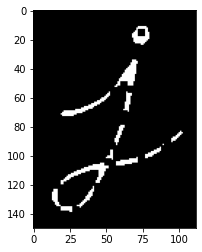

In [ ]:
er = cv2.erode(copy_image, kernel)
plt.imshow(er, cmap='gray')

**What do you notice? Is this what you expect?**

The image is thinner with missing chunks around the randomly flipped pixels. This is about what I expected.

**Now apply binary dilation to the eroded image above, and plot the result.**

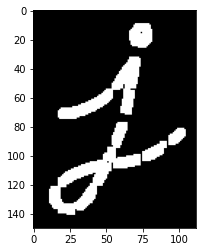

In [ ]:
di = cv2.dilate(er, kernel)
plt.imshow(di, cmap='gray')

**This is binary opening, where we use erosion followed by dilation. Is this what you expected? When do we want to use binary opening?**

This is kind of what I expected. The new image has the same thickness as the original image but with sections missing. I thought the process would create a perfect recreation of the original and just remove the noise. We want to use bianry opening when we want to get rid of background noise and don't necessarily care about integrity of the subject.

**Let's do the same thing, but now first with dilation then erosion. Here, perform binary dilation using the image with the pixels flipped and the same 5x5 kernel. Plot the results.**

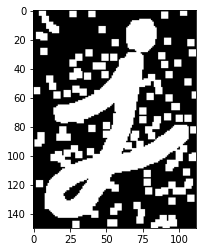

In [ ]:
di = cv2.dilate(copy_image, kernel)
plt.imshow(di, cmap='gray')

**What do you notice? Is this what you expected?**

This is about what I was expecting. All the white patches increase in size.

**Now apply binary erosion to the image above, and plot the results.**

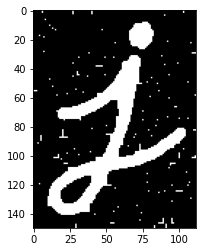

In [ ]:
er = cv2.erode(di, kernel)
plt.imshow(er, cmap='gray')

**This is binary closing, where we use dilation followed by erosion. Is this what you expected? When do we want to use binary closing?**

This wasn't what I expected. I thought it would return a perfect copy of the original. This fills in all the flipped pixels in the letter, but magnifies the noise outside the letter. We would use binary closing if we want to fill in noise in the subject and don't care about background noise.